1. "RATE" is the "sampling rate", i.e. the number of frames per second 
2. "CHUNK" is the (arbitrarily chosen) number of frames the (potentially very long) signals are split into in this example
3. Yes, each frame will have 2 samples as "CHANNELS=2", but the term "samples" is seldom used in this context (because it is confusing)
4. Yes, size of each sample is 2 bytes (= 16 bits) in this example
5. Yes, size of each frame is 4 bytes
6. Yes, each element of "frames" should be 4096 bytes. sys.getsizeof() reports the storage space needed by the Python interpreter, which is typically a bit more than the actual size of the raw data.
7. RATE * RECORD_SECONDS is the number of frames that should be recorded. Since the for loop is not repeated for each frame but only for each chunk, the number of loops has to be divided by the chunk size CHUNK. This has nothing to do with samples, so there is no factor of 2 involved.
8. If you really want to see the hexadecimal values, you can try something like [hex(x) for x in frames[0]]. If you want to get the actual 2-byte numbers use the format string '<H' with the struct module.

You might be interested in my tutorial about reading WAV files with the wave module, which covers some of your questions in more detail: http://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/audio-files/audio-files-with-wave.ipynb

## RECORRD a WAV file 

In [448]:
import pyaudio
import wave

chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # a 16 bits integer per sample
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 3
filename = "output2.wav"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

# Use the get_device_count and get_device_info_by_index methods of the PyAudio object in an interactive Python session. Print the dictionaries that get_device_info_by_index returns to determine which device index represents your microphone, and provide that index number as the input_device_index parameter when opening the stream.

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


Use the get_device_count and get_device_info_by_index methods of the PyAudio object in an interactive Python session. Print the dictionaries that get_device_info_by_index returns to determine which device index represents your microphone, and provide that index number as the input_device_index parameter when opening the stream.


## Read a wav file

In [3]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import struct
import pandas as pd
import numpy as np
import tkinter

#%matplotlib tk #this line is needed to show the live update of the graph

filename = 'output2.wav'

# Set chunk size of 1024 samples per data frame
chunk = 1024  

# Open the sound file 
wf = wave.open(filename, 'rb')

# Create an interface to PortAudio
p = pyaudio.PyAudio()

# Open a .Stream object to write the WAV file to
# 'output = True' indicates that the sound will be played rather than recorded
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

# Read data in chunks
data = wf.readframes(chunk)

# Play the sound by writing the audio data to the stream
chunk_num = 0

### to reproduce the graph in real time
#fig, ax = plt.subplots()
#x = np.arange(0,chunk)
#line, = ax.plot(x,np.random.rand(chunk))
#ax.set_ylim(-2000,2000)
#ax.set_xlim(0,chunk)

while data != b'':
    stream.write(data)
#    data_int = pd.DataFrame(struct.unpack('@'+str(chunk)+ 'h',data))
#    line.set_ydata(data_int)
#    fig.canvas.draw()
#    fig.canvas.flush_events()
    data = wf.readframes(chunk)
    chunk_num = chunk_num + 1

# Close and terminate the stream
stream.stop_stream()
stream.close()
p.terminate()


In [4]:
print(("Duration\t\t\t{} secs\nRate:\t\t\t\t{} frames per sec \n"+
       "Channles:\t\t\t{}\nframes:\t\t\t\t{}\n"+
       "Samples by Chunk:\t\t{}\nnumber of chunks per second:\t{}\n"+
       "Number of Chunks:\t\t{}")
      .format(wf.getnframes()/wf.getframerate(),
              wf.getframerate(),
              wf.getnchannels(),
              wf.getnframes(),
              chunk,
              wf.getframerate()/chunk,
              wf.getnframes() / chunk
             ))

Duration			2.995374149659864 secs
Rate:				44100 frames per sec 
Channles:			1
frames:				132096
Samples by Chunk:		1024
number of chunks per second:	43.06640625
Number of Chunks:		129.0


In [6]:
wf.getnframes()/wf.getframerate()

2.995374149659864

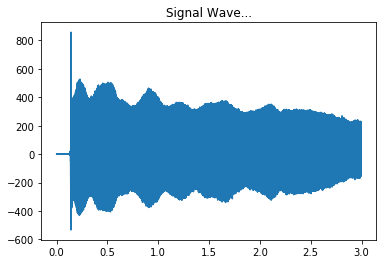

In [7]:
import sys
spf = wave.open("Output2.wav", "r")

# Extract Raw Audio from Wav File
signal_f = spf.readframes(-1)
#signal = np.fromstring(signal, "Int16") <- this is the old way to write it. It is being deprecated. 
signal = np.frombuffer(signal_f, np.int16)

fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

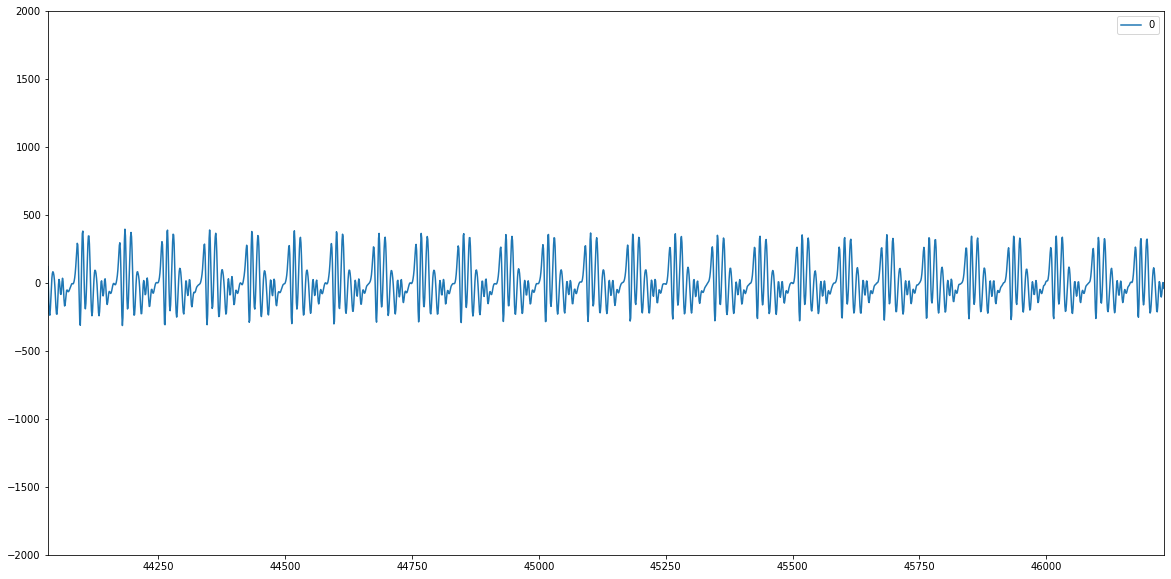

In [8]:
import matplotlib.pyplot as plt
import struct
import pandas as pd
import numpy as np
#%matplotlib tk

#start_frame =int(len(signal)/3*2.1)
#end_frame = int(len(signal)/3*2.8)

start_frame =int(len(signal)/3*1.0)
end_frame = int(len(signal)/3*1.05)


index_series = np.arange(start_frame, end_frame)
my_frames = pd.DataFrame(signal[start_frame:end_frame], index=index_series)

#data_int = pd.DataFrame(struct.unpack('@'+str(chunk)+ 'h',frame)) # 'h' is for 2 byte signed integer
ax = my_frames.plot(figsize=(20,10),ylim=(-2000,2000))



In [9]:
p = pyaudio.PyAudio()
stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)
stream.write(signal_f[start_frame*2:end_frame*2])

### This one play the whole signal again

In [400]:
p = pyaudio.PyAudio()
stream_2 = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)

stream_2.write(signal_f)

stream_2.stop_stream()
stream_2.close()
p.terminate()


In [10]:
def Play(my_signal):
    p = pyaudio.PyAudio()
    stream_2 = p.open(format = p.get_format_from_width(wf.getsampwidth()),
                    channels = wf.getnchannels(),
                    rate = wf.getframerate(),
                    output = True)
    stream_2.write(my_signal.tobytes())
    stream_2.stop_stream()
    stream_2.close()
    p.terminate()

In [11]:
Play(signal)

## Fourier Transformation

These functions asume that:

x moves from 0 to 2*Pi*

n is the degree of the Fourier serie

f is the function of x that we are analyzing

In [12]:
x_spread = my_frames.index[-1]-my_frames.index[0]
my_step = 2*np.pi/x_spread

In [13]:
def a0(f,x):
    return (sum(f(x))-f(x)[0]/2 - f(x)[-1]/2 )*my_step/2/np.pi
def an(f,x,n):
    return (sum(f(x)*np.cos(n*x)) - f(x)[0]*np.cos(n*x[0])/2 - f(x)[-1]*np.cos(n*x[-1])/2)*my_step/np.pi
def bn(f,x,n):
    return (sum(f(x)*np.sin(n*x)) - f(x)[0]*np.sin(n*x[0])/2 - f(x)[-1]*np.sin(n*x[-1])/2)*my_step/np.pi

def F(f,x,n):#Calculates the Fourrier serie of dgree n for the function f(x)
    Fourier = x * 0
    Fourier += a0(f,x)
    for i in range(n):
        Fourier += an(f,x,i+1)*np.cos((i+1)*x)+ bn(f,x,i+1)*np.sin((i+1)*x)
    return Fourier

def F_tr(f,x,n): #Calculates the coeficients of the fourier transformed of f
    coef_nm=[]
    coef=[]
    coef.append(a0(f,x))
    coef_nm.append('a0')
    for i in range (n):
        coef_nm.append('a'+ str(i+1))
        coef.append(an(f,x,i+1))
        coef_nm.append('b'+ str(i+1))
        coef.append(bn(f,x,i+1))
   # plt.bar(coef_nm,coef)
    return pd.DataFrame(coef,coef_nm) 

In [14]:
def F_2(x,coefs): #Adds up a Fouriere series starting from an array of coeficiencs 
    n = int((len(coefs)-1)/2)
    Fourier = np.zeros(len(x))
    Fourier += coefs[0][0]

    for i in range(n):
        Fourier += coefs[0][2*(i+1)-1]*np.cos((i+1)*x)+ coefs[0][2*(i+1)]*np.sin((i+1)*x)
    return Fourier

In [15]:
def my_func(x): #uses my_frames to simulate a funciton of x that goes from 0 to 2 pi with the same number of frames 
    if type(x)== type(np.arange(0,1)):
        result = []
        for i in x:
            result.append(my_func(i))
        return result
    else:
        x_spread = my_frames.index[-1]-my_frames.index[0]
        return my_frames[0][int(x*x_spread/2/np.pi)+my_frames.index[0]]
    


## Frequency to Notes

In [27]:
notes_nm = ['A','A#','B','C','C#','D','D#','E','F','F#','G','G#']
notes_fr = np.zeros(12*8)
notes_rate = 2**(1/12) 
notes_df = pd.DataFrame(columns = ['name','frec'])

for j in range(8):
    for i in range(12):
        new_note = pd.DataFrame([[str(j)+notes_nm[i], 27.5*(notes_rate)**(i+j*12)]] ,columns = ['name','frec'])
        notes_df=notes_df.append(new_note, ignore_index=True)
#        print("{}\t{}".format(str(j)+notes_nm[i],27.5*(notes_rate)**(i+j*12)))

#notes_df.set_index(['name'])




def tunner(frec):
    if frec < 27.5:
        return 'out of range'
    else: 
        for j in range(8):
            if frec < 27.5*2**(1/24)*(notes_rate)**(j*12)*2:
                for i in range(12):
                    if frec < 27.5*2**(1/24)*(notes_rate)**(i+j*12):
                        return "{} ~{:.0%}".format(notes_df.loc[i+j*12,['name']].values[0] , 
                                                   np.log2(frec/notes_df.loc[i+j*12,['frec']].values[0])*12)


In [16]:
x_spread = my_frames.index[-1]-my_frames.index[0]
x=np.arange(0,np.pi*2,2*np.pi/x_spread)

In [17]:
F_data = F(my_func,x,100)

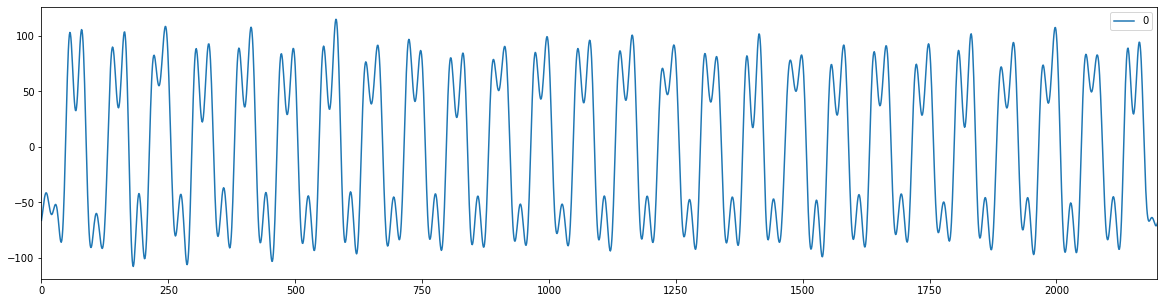

In [18]:
pd.DataFrame(F_data).plot(figsize=(20,5))

In [19]:
Play(F_data.astype('int16'))

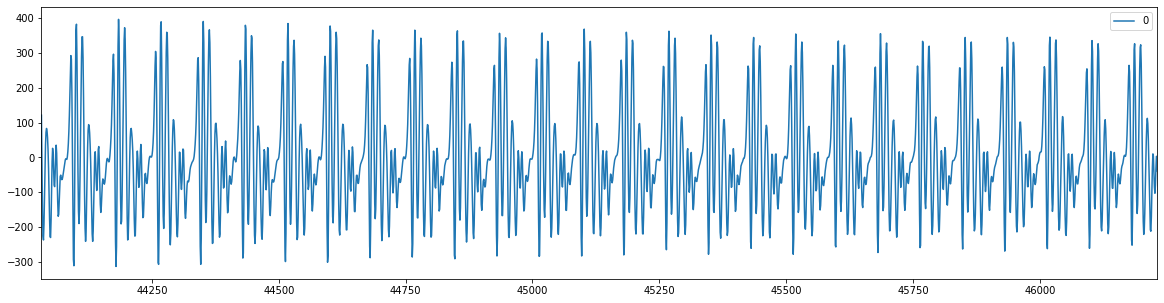

In [21]:
my_frames.plot(figsize=(20,5))

In [22]:
Play(my_frames.values)

In [23]:
Frecs = F_tr(my_func,x,100)

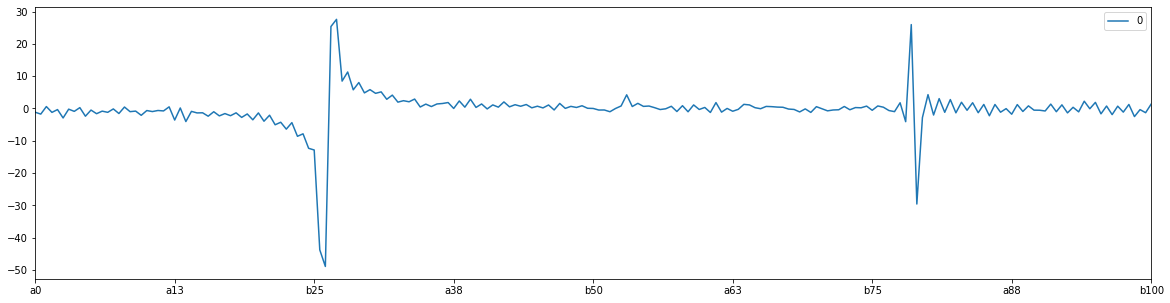

In [24]:
Frecs.plot(figsize=(20,5))

In [25]:
print("minimum\n\tvalues:\t\t {} \n\tin the coef:\t {}".format(Frecs.min(axis=0)[0], Frecs.idxmin(axis=0)[0]))
print("maximum\n\tvalues:\t\t {} \n\tin the coef:\t {}".format(Frecs.max(axis=0)[0], Frecs.idxmax(axis=0)[0]))

minimum
	values:		 -48.90918443027424 
	in the coef:	 b26
maximum
	values:		 27.576305211624845 
	in the coef:	 b27


In [28]:
length = len(Frecs)     # the number of frames in the signal
rate= spf.getframerate() #the sample rate of the original file. ussually 44100 Hz
duration= length/rate    #The duration in seconds of the signal

step=int(length /10)
print("Section\t\tmin\t\tmin coef\tFrec\tmax\t\tmax coef\tFrec")
for i in range (10):
    print("{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(i,
                                            Frecs[step*(i):step*(i+1)].min(axis=0)[0],
                                            Frecs[step*(i):step*(i+1)].idxmin(axis=0)[0],
                                            int(Frecs[step*(i):step*(i+1)].idxmin(axis=0)[0][1:])/duration,
                                            Frecs[step*(i):step*(i+1)].max(axis=0)[0],
                                            Frecs[step*(i):step*(i+1)].idxmax(axis=0)[0],
                                            tunner(int(Frecs[step*(i):step*(i+1)].idxmax(axis=0)[0][1:])/duration)))


Section		min		min coef	Frec	max		max coef	Frec
0	-2.945314413022466	a3	658.2089552238806	0.5800489585065811	b1	3A ~-5%

1	-4.057977165484822	a14	3071.6417910447763	0.4920417600837544	b12	6E ~-3%

2	-48.90918443027424	b26	5704.477611940299	27.576305211624845	b27	7F# ~1%

3	-0.005788158779136998	a38	8337.313432835821	5.820558495137506	b30	7G# ~-16%

4	-0.4713318311311857	a47	10311.940298507463	2.0182769180772975	b42	None

5	-1.0300865613718952	a59	12944.776119402986	4.213820179659994	b53	None

6	-1.2458802887961862	a61	13383.58208955224	1.812053979351573	b61	None

7	-29.584341216434574	b79	17332.835820895525	25.953950243560644	a79	None

8	-2.259282086136791	a86	18868.65671641791	4.269741878620998	b80	None

9	-2.519370407752485	a99	21720.895522388062	2.2336146931092085	b94	None



In [29]:
Frecs[Frecs[0]>10]

,0
a27,25.353919
b27,27.576305
b28,11.279976
a79,25.953950


In [30]:
Frecs[Frecs[0]<-10]

,0
a25,-12.338136
b25,-12.863571
a26,-43.781004
b26,-48.909184
b79,-29.584341


In [31]:
data_frec=abs(Frecs).sort_values(by=[0], ascending=False).head(8)
for frec in data_frec.index:
    print(tunner(int(frec[1:])/duration))

7F ~36%
7F ~36%
None
7F# ~1%
None
7F# ~1%
7F ~-32%
7F ~-32%


In [32]:
data_frec.index

Index(['b26', 'a26', 'b79', 'b27', 'a79', 'a27', 'b25', 'a25'], dtype='object')

In [33]:
Test = F_2(x,Frecs)

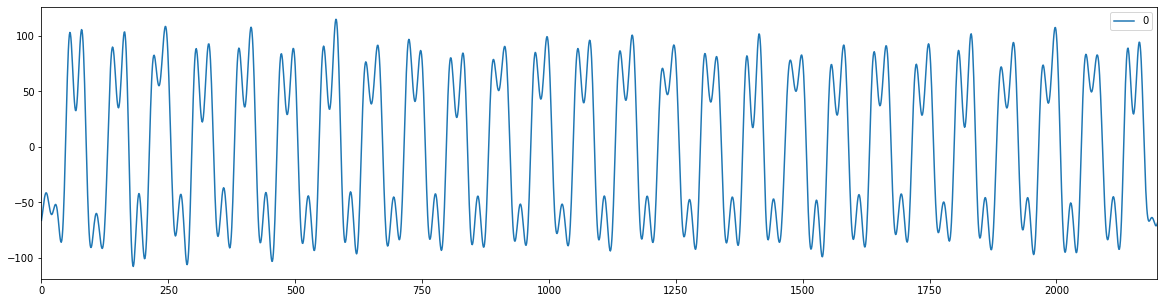

In [34]:
pd.DataFrame(Test).plot(figsize=(20,5))

In [35]:
Play(Test.astype('int16'))

In [36]:
Frecs_simple = Frecs.copy()
Frecs_simple[abs(Frecs_simple[0])<5]=0

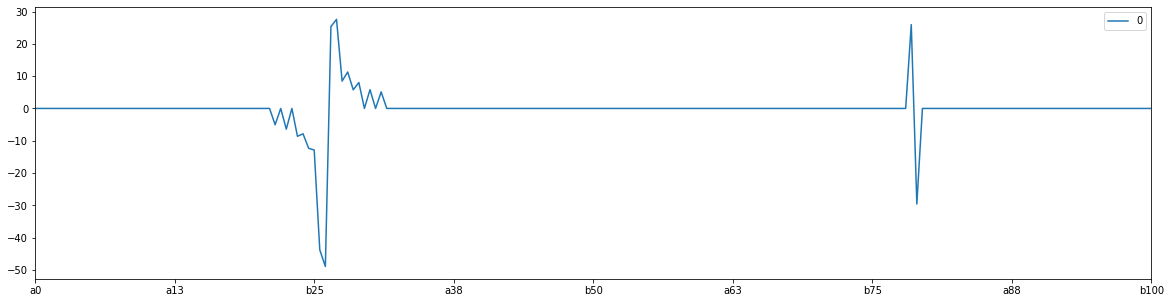

In [37]:
Frecs_simple.plot(figsize=(20,5))

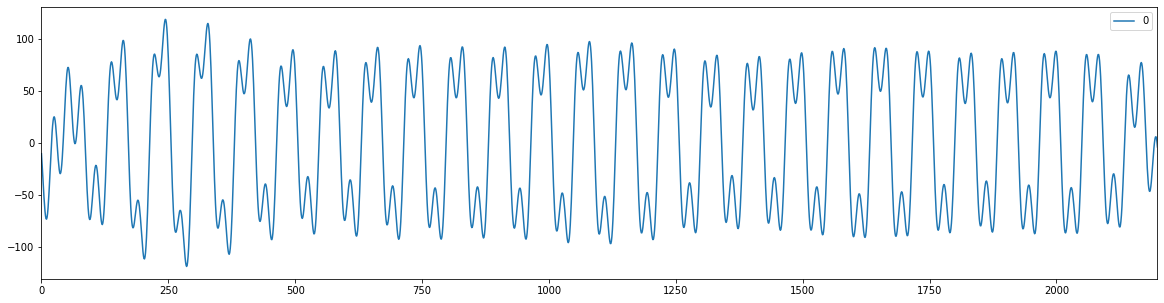

In [38]:
Test_2 = F_2(x,Frecs_simple)
pd.DataFrame(Test_2).plot(figsize=(20,5))

In [39]:
Play(Test_2.astype('int16'))

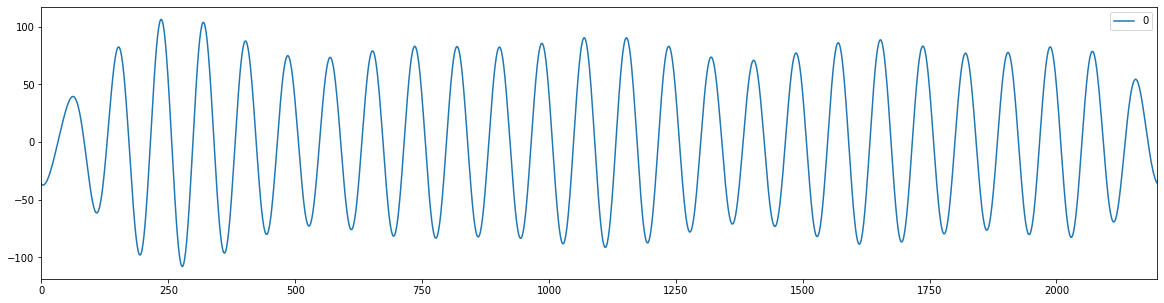

In [40]:
Test_3 = F_2(x,Frecs_simple[0:80])
pd.DataFrame(Test_3).plot(figsize=(20,5))

In [41]:
Play(Test_3.astype('int16'))

In [42]:
tunner(Frecs_simple[0:80])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [43]:
Frecs.head()

,0
a0,-1.174318
a1,-1.749600
b1,0.580049
a2,-1.219754
b2,-0.350481


## Continuous Fourier

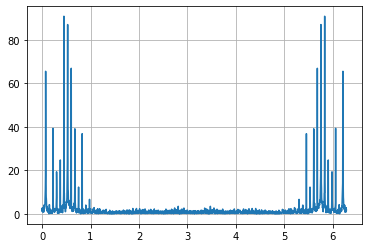

In [61]:
import scipy
from scipy.fftpack import fft, ifft
# Number of sample points
N=len(x)
yf = fft(my_func(x))
plt.plot(x, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

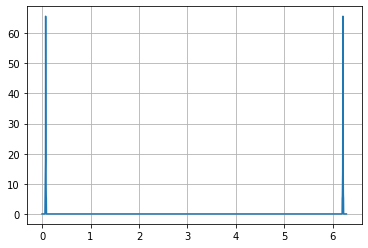

In [62]:
N=len(x)
yf = fft(Test_3)
plt.plot(x, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

In [65]:
abs(yf).max()

72206.30454931654

In [53]:
np.abs(yf[0:N//2])

array([2522.        , 1969.28929695, 1337.02090484, ...,  830.77201266,
        518.55582327,  137.31601795])

## Analysis Section: 

In [360]:
print("signal: {}\n".format(type(signal)) + 
     "signal_f {}\n".format(type(signal_f)) +
     "my_frames {}\n".format(type(my_frames)) + 
     "my_frames.values {}\n".format(type(my_frames.values)) +
     "my_frames.values[0] {}\n".format(type(my_frames.values[0])) +
      "F_data {}\n".format(type(F_data))+
      "F_data.astype('int16')[0] {}\n".format(type(F_data.astype('int16')[0])) +
      "F_data[0] {}\n".format(type(F_data[0]))
     )

signal: <class 'numpy.ndarray'>
signal_f <class 'bytes'>
my_frames <class 'pandas.core.frame.DataFrame'>
my_frames.values <class 'numpy.ndarray'>
my_frames.values[0] <class 'numpy.ndarray'>
F_data <class 'numpy.ndarray'>
F_data.astype('int16')[0] <class 'numpy.int16'>
F_data[0] <class 'numpy.float64'>



In [358]:
F_data.astype('int16')[0:20]

array([ 370,  460,  539,  602,  647,  674,  682,  668,  635,  581,  510,
        422,  320,  206,   86,  -37, -161, -280, -390, -487], dtype=int16)

In [353]:
F_data.astype('int')[0:2].tobytes()

b'r\x01\x00\x00\xcc\x01\x00\x00'

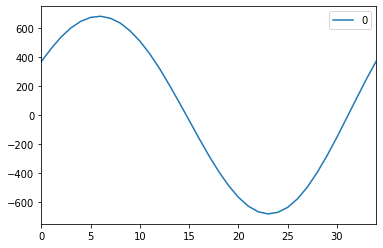

In [351]:
pd.DataFrame(F_data.astype('int'))[0:35].plot()

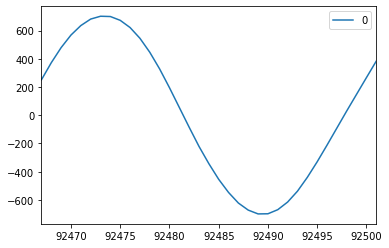

In [352]:
my_frames[0:35].plot()

In [336]:
my_frames.values[0:2].tobytes()

b'\xfb\x00t\x01'

In [648]:
spf.getframerate()

44100

# Apendix

use sys.byteorder to check the endianness of the system

| Charracter | Byte order | Size | Alignment |
|:----------:|------------|------|-----------|
|@|Native|Native|Native|
|=|native|standard|none|
|<|little-endian|standard|none|
|>|big-endian|standard|none|
|!|network (= big-endian)|standard|none|


|rmat|C Type|Python type|Standard size|Notes|
|----------|----------|----------|----------|----------|
|x|pad byte|no value|||
|c|char|bytes of length 1|1||
|b|signed char|integer|1|(1), (2)|
|B|unsigned char|integer|1|-2|
|?|_Bool|bool|1|-1|
|h|short|integer|2|-2|
|H|unsigned short|integer|2|-2|
|i|int|integer|4|-2|
|I|unsigned int|integer|4|-2|
|l|long|integer|4|-2|
|L|unsigned long|integer|4|-2|
|q|long long|integer|8|-2|
|Q|unsigned long long|integer|8|-2|
|n|ssize_t|integer||-3|
|N|size_t|integer||-3|
|e|-6|float|2|-4|
|f|float|float|4|-4|
|d|double|float|8|-4|
|s|char[]|bytes|||
|p|char[]|bytes|||
|P|void *|integer||-5|


https://docs.python.org/3/library/struct.html#struct-format-strings


It seems that Int16 codes positive numbers until 32767 (hex7fff) and then start with the negatives -32768 (hex8000) until -1 (hexffff)

|int|bin|
|---|---|
|0|\x00 \x00|
|1|\x00 \x01|
|...|...|
|32767|\x7f \xff|
|-32768|\x80 \x00|
|...|...|
|-1|\xff \xff|